In [2]:
#discription

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
#import dataset
from google.colab import files
uploaded=files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [4]:
#store the the data into dataframe
df=pd.read_csv("BTC-USD.csv")

In [5]:
#show the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2710 non-null   object 
 1   Open       2710 non-null   float64
 2   High       2710 non-null   float64
 3   Low        2710 non-null   float64
 4   Close      2710 non-null   float64
 5   Adj Close  2710 non-null   float64
 6   Volume     2710 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.3+ KB


In [7]:
#setting date as index 
df=df.set_index(pd.DatetimeIndex(df["Date"].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


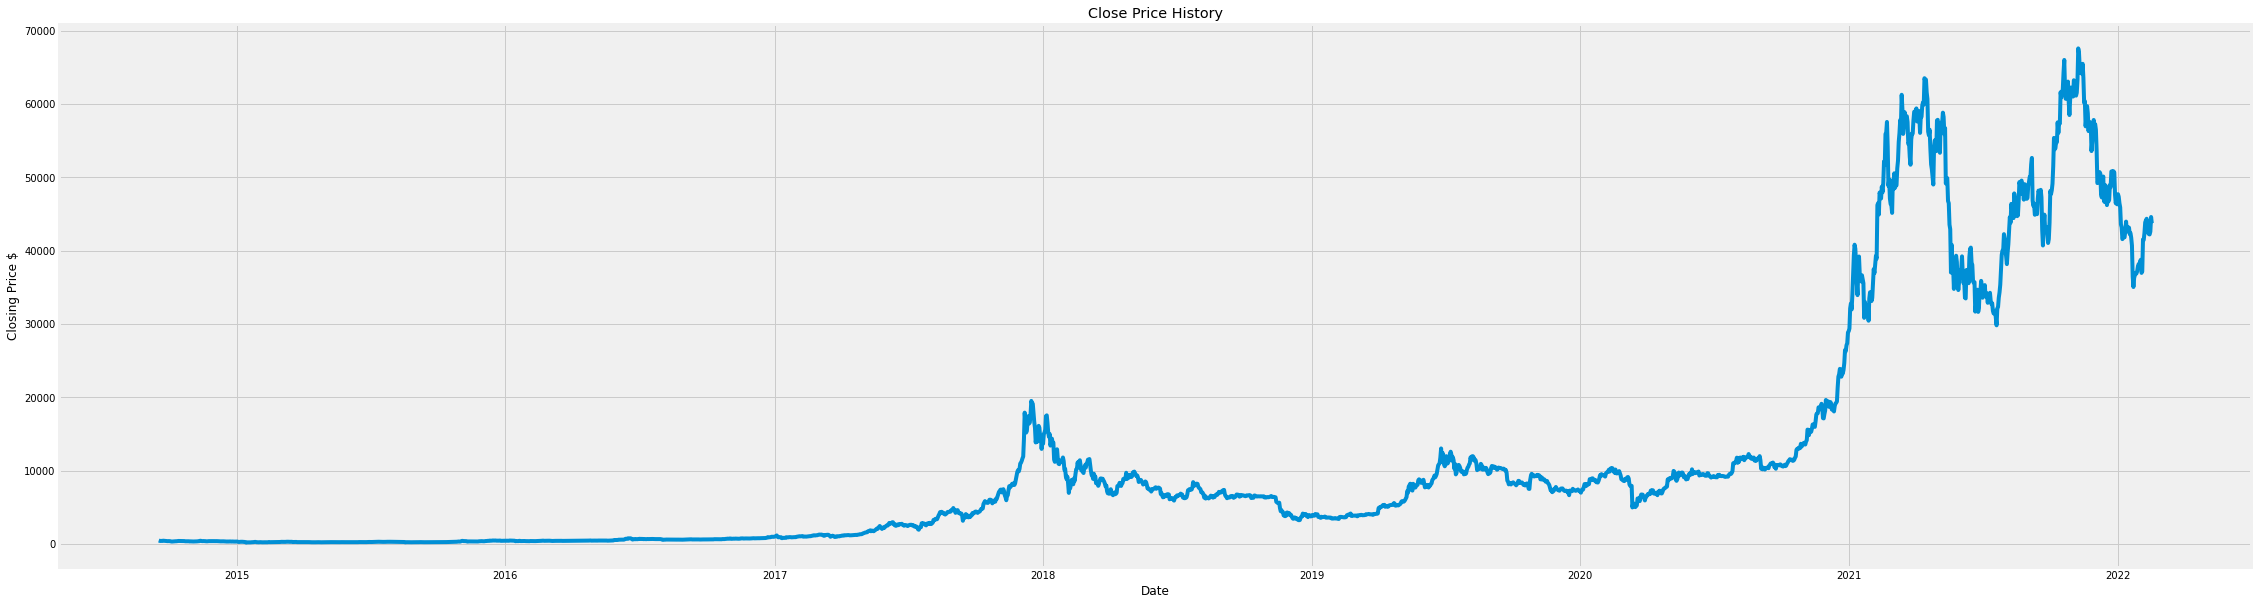

In [8]:
#Visual representation of Closing BTC Price
plt.figure(figsize=(35,10))
plt.plot(df["Close"],label="Close")
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Closing Price $")
plt.show()

In [9]:
#calculating 12 day exponential moving average and 26 day exponential moving average and subtracting it for our indicator signal
#calculating 12 day EMA
shortEMA=df["Close"].ewm(span=12,adjust=False).mean()
#calculating 26 day EMA
longEMA=df["Close"].ewm(span=26,adjust=False).mean()
#calculating difference of shortEMA and longEMA for difference moving average line
DMA=shortEMA-longEMA
#calculating exponential average of DMA line for quick movement 
signal=DMA.ewm(span=9,adjust=False).mean()

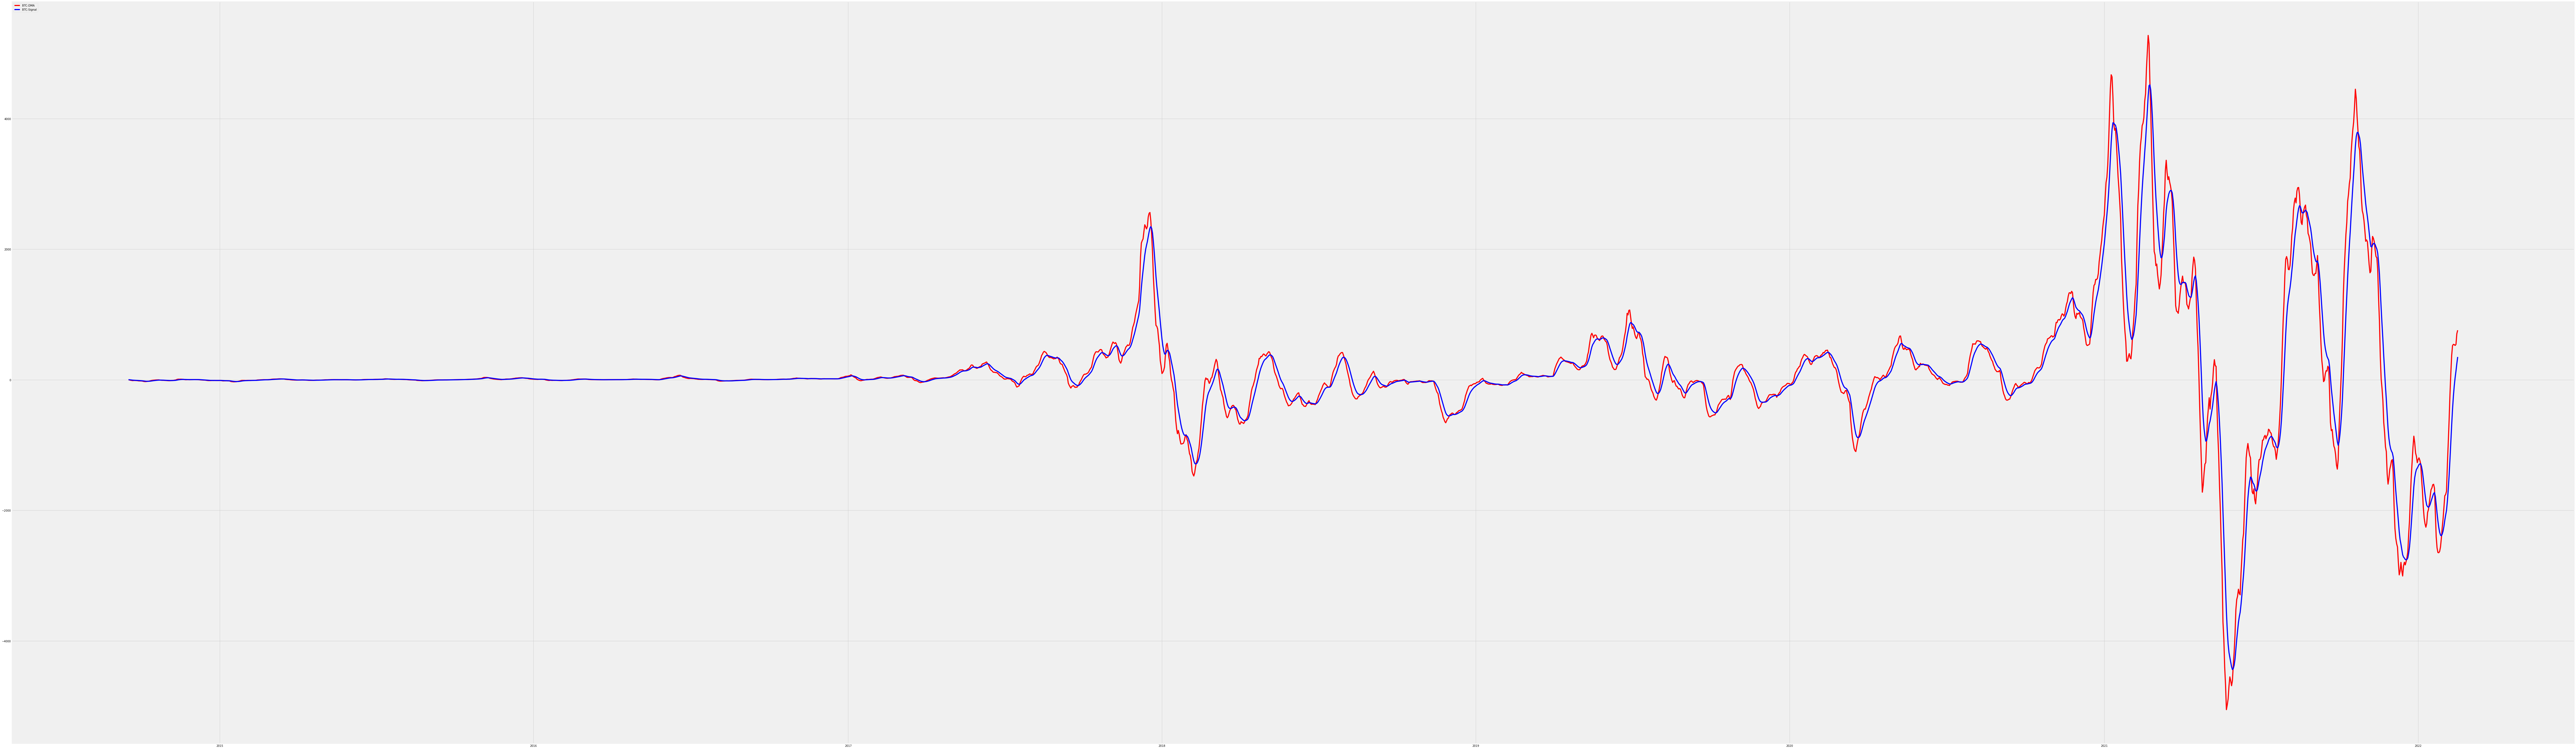

In [10]:
#plotting both chart DMA and signal
plt.figure(figsize=(150,50))
plt.plot(df.index,DMA,label="BTC-DMA",color="red")
plt.plot(df.index,signal,label="BTC-Signal",color="blue")
plt.legend(loc="upper left")
plt.show()


In [11]:
#Adding DMA and Signal to our dataframe 
df["DMA"] = DMA
df["Signal"] = signal

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DMA,Signal
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.000000,0.000000
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-2.624024,-0.524805
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-7.014744,-1.822793
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,-9.249402,-3.308115
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-11.699137,-4.986319


In [12]:
#creating function to represent when to buy and sell
def buy_sell(signal):
  Buy=[]
  Sell=[]
  flag=-1

  for i in range(0,len(signal)):
    if signal["DMA"][i] > signal["Signal"][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal["Close"][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal["DMA"][i] < signal["Signal"][i]:
      Buy.append(np.nan)      
      if flag != 0:
        Sell.append(signal["Close"][i])
        flag=0
      else:
        Sell.append(np.nan)
    else :
      Buy.append(np.nan)    
      Sell.append(np.nan)

  return(Buy,Sell)      


In [13]:
#creating Buy and Sell column
a=buy_sell(df)
df["Buy_signal"]=a[0]
df["Sell_signal"]=a[1]


In [14]:
#showing data and confirming if everything is added in dataframe or not
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DMA,Signal,Buy_signal,Sell_signal
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.000000,0.000000,NaN,NaN
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-2.624024,-0.524805,NaN,424.440002
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-7.014744,-1.822793,NaN,NaN
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,-9.249402,-3.308115,NaN,NaN
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-11.699137,-4.986319,NaN,NaN


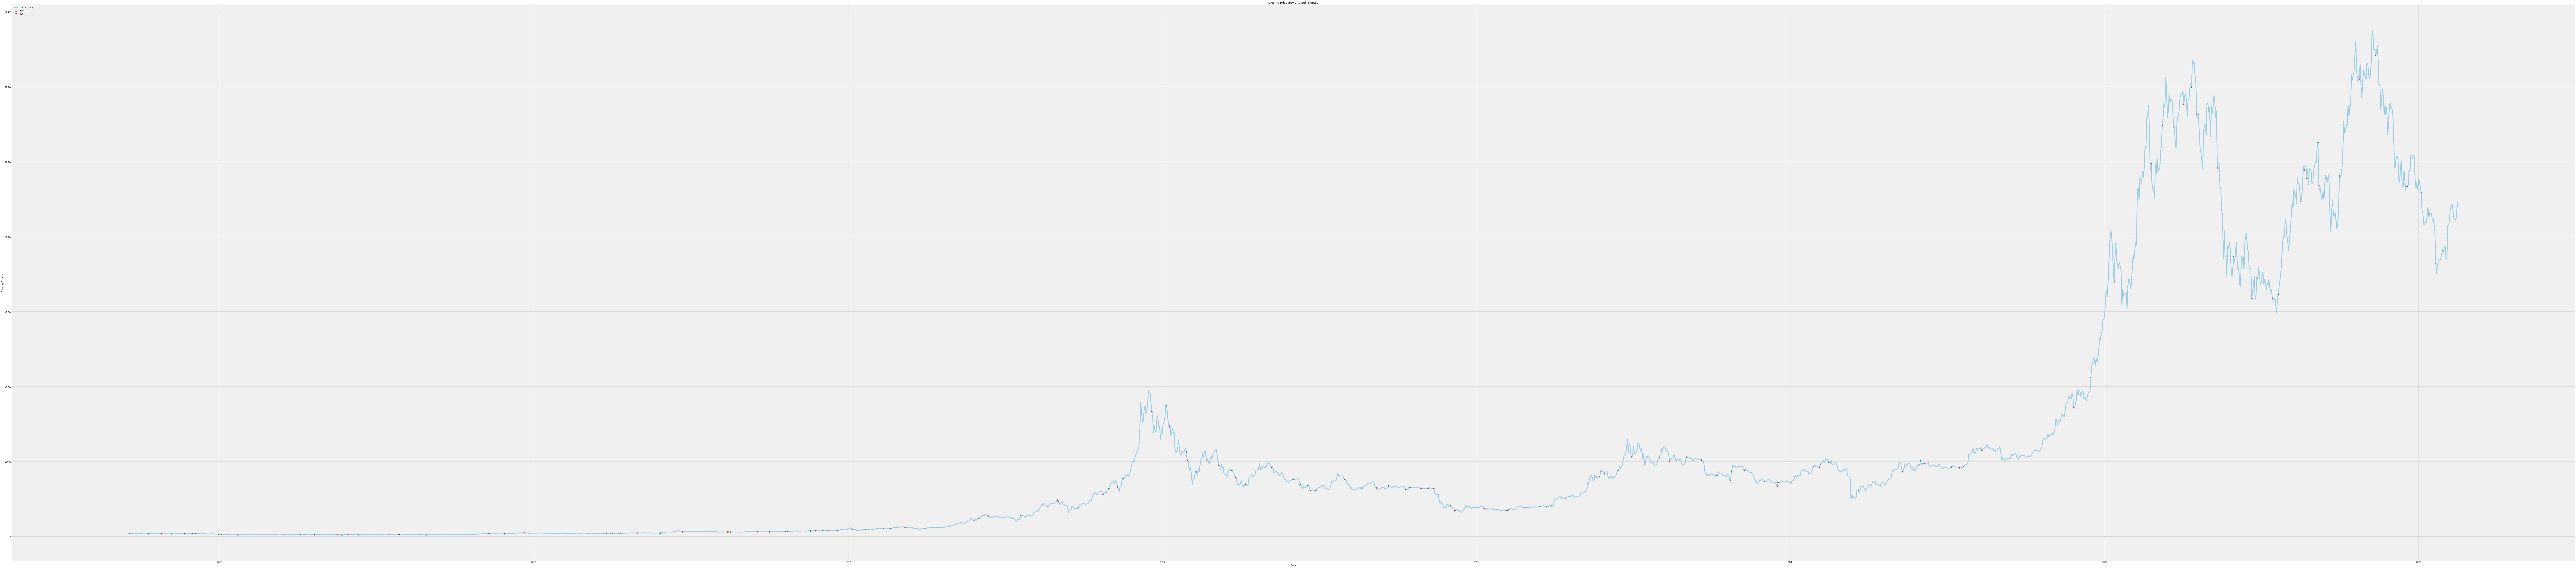

In [15]:
#Visual Representation of BTC buy and sell Signal
plt.figure(figsize=(200,50))
plt.scatter(df.index,df["Buy_signal"],label="Buy",color="green",marker="^",alpha=1)
plt.scatter(df.index,df["Sell_signal"],label="Sell",color="red",marker="v",alpha=1)

plt.plot(df["Close"],label="Closing Price",alpha=0.35)
plt.title("Closing Price Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("Closing Price $ ")

plt.legend(loc="upper left")

plt.show()

In [ ]:
#for downloading csv file
#files.download("Binance_BTC_1hr_Dataset.csv")
df.to_csv('df.csv')
files.download('df.csv')

In [ ]:
df